## Linear Regression-Medical Insurance

In [14]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

import pickle
import json

import matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv('medical_insurance.csv')
df.shape

(1338, 7)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='age'>

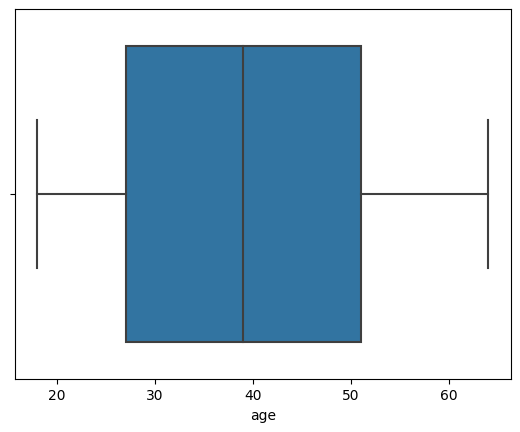

In [15]:
sns.boxplot(df['age'])

In [16]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [17]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [19]:
df['sex'].replace({'female':0, 'male':1}, inplace=True)

<AxesSubplot:xlabel='bmi'>

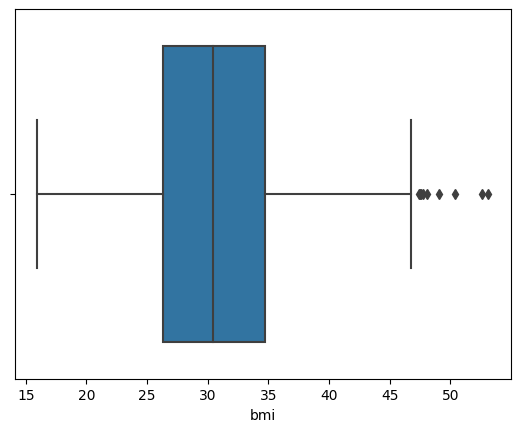

In [20]:
sns.boxplot(df['bmi'])

In [22]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

47.290000000000006

In [23]:
df['bmi'] = np.where(df['bmi'] > upper_limit, upper_limit, df.bmi)

In [25]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [26]:
df['smoker'].replace({'no':0, 'yes':1}, inplace=True)

In [28]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [30]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [31]:
df = pd.get_dummies(df, columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


## Train Test Split

In [32]:
x = df.drop('charges', axis = 1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

## Model TRaining

In [33]:
linear_Reg = LinearRegression()
linear_Reg.fit(x_train, y_train)

LinearRegression()

In [34]:
def evaluation(string, model, ind_var, act):
    print(string.center(50, '*'))
    pred = model.predict(ind_var)
    
    mse = mean_squared_error(act, pred)
    print('MSE :', mse)
    
    rmse = np.sqrt(mse)
    print('RMSE :', rmse)
    
    mae = mean_absolute_error(act, pred)
    print('MAE :', mae)
    
    r2_val = r2_score(act, pred)
    print('R-Squared Value :', r2_val)
    
evaluation('Testing Data Evaluation', linear_Reg, x_test, y_test)
print()
evaluation('Training Data Evaluation', linear_Reg, x_train, y_train)

*************Testing Data Evaluation**************
MSE : 38187969.28780177
RMSE : 6179.641517742091
MAE : 4274.788799627741
R-Squared Value : 0.7457199654909236

*************Training Data Evaluation*************
MSE : 36112914.99722176
RMSE : 6009.402216295874
MAE : 4141.269682174436
R-Squared Value : 0.7519319715734534


## Testing on Single Row

In [39]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,1.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [41]:
x.head(1).values

array([[19. ,  0. , 27.9,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ]])

In [47]:
age = 19.0
sex = 'male'
bmi = 27.9
children = 0.0
smoker = 'yes'
region = 'northeast'

# charges = ?

In [42]:
test_array = np.array([19. ,  0. , 27.9,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ], ndmin=2)
test_array

array([[19. ,  0. , 27.9,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ]])

In [43]:
linear_Reg.predict(test_array)

array([25268.80172201])

In [44]:
project_data = {'sex': {'female':0, 'male':1},
               'smoker':{'no':0, 'yes':1}}
project_data

{'sex': {'female': 0, 'male': 1}, 'smoker': {'no': 0, 'yes': 1}}

In [ ]:
sex = 'male'

In [48]:
project_data['sex'][sex]

1

In [49]:
project_data['smoker'][smoker]

1

In [50]:
column_names = x.columns
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [51]:
age = 19.0
sex = 'male'
bmi = 27.9
children = 0.0
smoker = 'yes'
region = 'northeast'

# charges = ?

In [52]:
project_data = {'sex': {'female':0, 'male':1},
               'smoker':{'no':0, 'yes':1},
               'columns': list(column_names)}
project_data

{'sex': {'female': 0, 'male': 1},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [58]:
region_val = 'region_' +region
region_index = np.where(column_names == region_val)[0][0]
region_index

5

In [55]:
list(column_names).index(region_val)

5

In [59]:
x.shape[1]

9

In [62]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,1.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [63]:
age = 19.0
sex = 'male'
bmi = 27.9
children = 0.0
smoker = 'yes'
region = 'northeast'

# charges = ?

In [68]:
project_data['sex'][sex]

1

In [72]:
test_array = np.zeros(x.shape[1])
test_array[0] = age
test_array[1] = project_data['sex'][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = project_data['smoker'][smoker]
region_val = 'region_' + region
region_index = project_data['columns'].index(region_val)
test_array[region_index] = 1
test_array

array([19. ,  1. , 27.9,  0. ,  1. ,  1. ,  0. ,  0. ,  0. ])

In [71]:
project_data['columns'].index(region_val)

5

In [75]:
result = linear_Reg.predict([test_array])[0]
print(f'Charges for Medical Insurance are : RS. {round(result,2)}')

Charges for Medical Insurance are : RS. 26185.29


## Saving Model and JSON

In [76]:
with open('Linear_Model.pkl', 'wb') as f:
    pickle.dump(linear_Reg, f)

In [77]:
with open('project_data.json', 'w') as f:
    json.dump(project_data, f)